In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
dataset_name = 'mnist'

In [3]:
if dataset_name == 'mnist':
	(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
elif dataset_name == 'cifar10':
	(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train = X_train / 255.0
X_test = X_test / 255.0

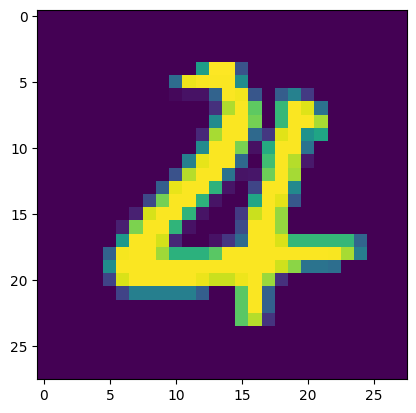

In [5]:
plt.imshow(random.choice(X_train))
plt.show()

In [6]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
model = Sequential([
	Input(shape=(X_train.shape[1], X_train.shape[2])),
	Flatten(),
	Dense(128, activation='relu'),
	Dropout(0.2),
	Dense(64, activation='relu'),
	Dropout(0.2),
	Dense(10, activation='softmax')
])

In [9]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=11, validation_data=(X_test, y_test))

Epoch 1/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.6018 - loss: 1.2671 - val_accuracy: 0.9083 - val_loss: 0.3424
Epoch 2/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8705 - loss: 0.4369 - val_accuracy: 0.9279 - val_loss: 0.2571
Epoch 3/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8998 - loss: 0.3421 - val_accuracy: 0.9383 - val_loss: 0.2153
Epoch 4/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9133 - loss: 0.2969 - val_accuracy: 0.9444 - val_loss: 0.1880
Epoch 5/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9236 - loss: 0.2615 - val_accuracy: 0.9495 - val_loss: 0.1704
Epoch 6/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9316 - loss: 0.2363 - val_accuracy: 0.9540 - val_loss: 0.1537
Epoch 7/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9358 - loss: 0.2193 - val_accuracy: 0.9562 - val_loss: 0.1421
Epoch 8/11
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9429 - loss: 0.1990

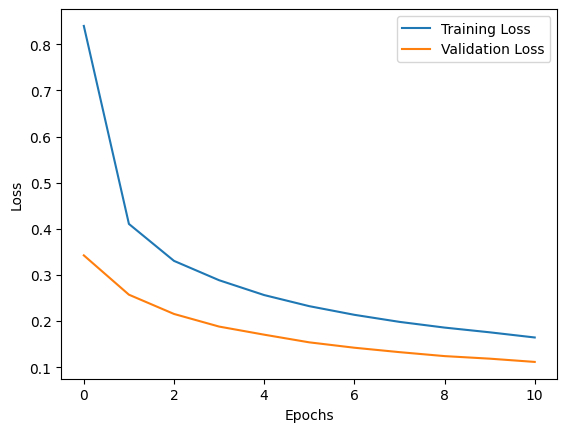

In [11]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

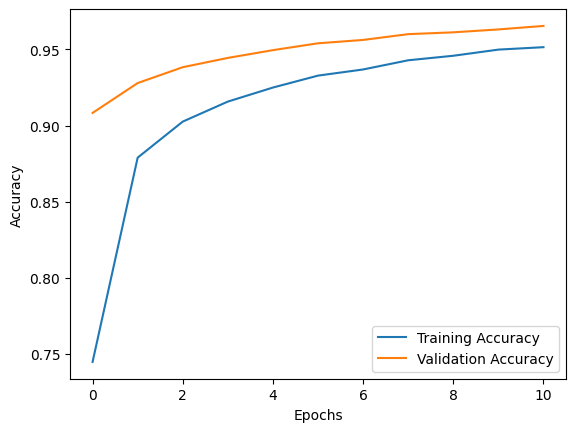

In [12]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [13]:
loss, accuracy = model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9595 - loss: 0.1329


In [14]:
y_preds = model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Actual label: 1
Predicted label: 1


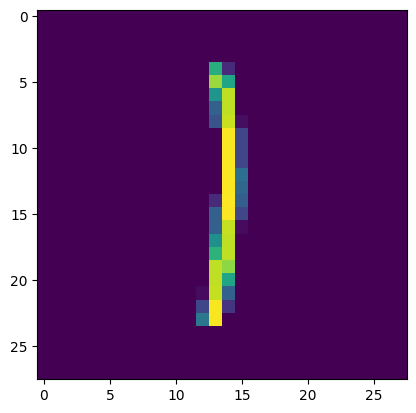

In [15]:
plt.imshow(X_test[40])
print(f'Actual label: {np.argmax(y_test[40])}')
print(f'Predicted label: {np.argmax(y_preds[40])}')
plt.show()